In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

Linear_fit_perio_year_20161225.dat      Linear_fit_perio_year_20200122.out
Linear_fit_perio_year_20161225.ipynb    Linear_fit_perio_year_20200122_Res.jpg
Linear_fit_perio_year_20161225.out      Linear_fit_period_year_2017KG5.dat
Linear_fit_perio_year_20161225_Res.jpg  Linear_fit_period_year_2017KG5.ipynb
Linear_fit_perio_year_20170217.dat      Linear_fit_period_year_2017KG5.out
Linear_fit_perio_year_20170217.ipynb    Linear_fit_period_year_2017KG5_Res.jpg
Linear_fit_perio_year_20170217.out      Linear_fit_period_year_2020KG5.dat
Linear_fit_perio_year_20170217_Res.jpg  Linear_fit_period_year_2020KG5.ipynb
Linear_fit_perio_year_20200121.dat      Linear_fit_period_year_2020KG5.out
Linear_fit_perio_year_20200121.ipynb    Linear_fit_period_year_2020KG5_Res.jpg
Linear_fit_perio_year_20200121.out      Linear_fit_period_year_2020g.dat
Linear_fit_perio_year_20200121_Res.jpg  Linear_fit_period_year_2020g.ipynb
Linear_fit_perio_year_20200122.dat      Linear_fit_period_year_2020g.out
Linear_fit_pe

In [3]:
#Read data ---#1
Input = "Linear_fit_period_year_2020g.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2450000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

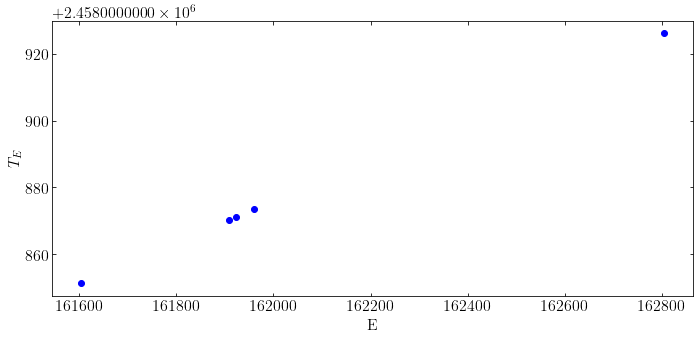

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

5


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc)
print(covariance)

Slope (m) is  0.06236282479497149
The error of the slope (dm) is  7.995478133656051e-16
Intercept (c) is  2448773.2186609507
The error of the intercept (dc) is  2.0993733964535667e-05
[[ 7.99547813e-16 -1.29558444e-10]
 [-1.29558444e-10  2.09937340e-05]]


In [10]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, m, c)

ys = m*x + c #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[2458851.30060629 2458870.25888747 2458871.1943114  2458873.4394328
 2458926.13599003]
[2771981.21866095 2772589.21866095 2772619.21866095 2772691.21866095
 2774381.21866095]
[-313129.91805466 -313718.95977348 -313748.02434955 -313817.77922815
 -315455.08267092]
[161604.         161628.48979592 161652.97959184 161677.46938776
 161701.95918367 161726.44897959 161750.93877551 161775.42857143
 161799.91836735 161824.40816327 161848.89795918 161873.3877551
 161897.87755102 161922.36734694 161946.85714286 161971.34693878
 161995.83673469 162020.32653061 162044.81632653 162069.30612245
 162093.79591837 162118.28571429 162142.7755102  162167.26530612
 162191.75510204 162216.24489796 162240.73469388 162265.2244898
 162289.71428571 162314.20408163 162338.69387755 162363.18367347
 162387.67346939 162412.16326531 162436.65306122 162461.14285714
 162485.63265306 162510.12244898 162534.6122449  162559.10204082
 162583.59183673 162608.08163265 162632.57142857 162657.06122449
 162681.55102041 162706.

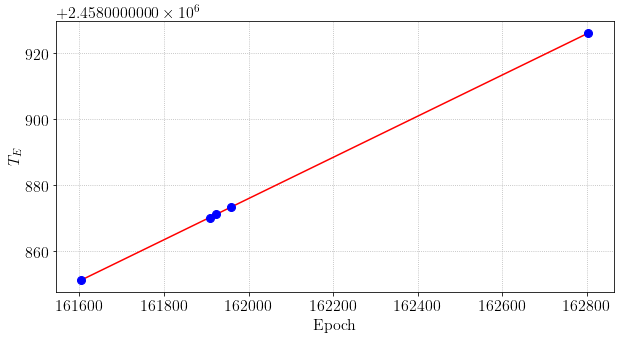

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

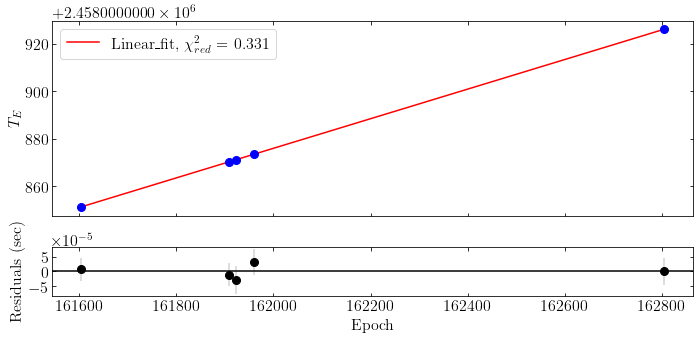

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()